<a href="https://colab.research.google.com/github/gkdivya/CNN/blob/master/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-09-04 13:01:43.642570


In [36]:
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Add, Input
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-09-04 13:29:08.899544


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 2s 0us/step
2019-09-04 13:01:46.298533


(60000, 28, 28)
2019-09-04 13:01:46.328553


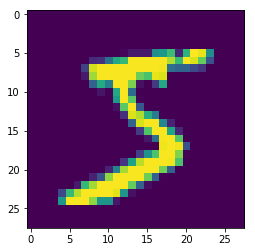

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-09-04 13:01:46.503920


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-09-04 13:01:46.662473


In [8]:
y_train[:10]
print(datetime.datetime.now())

2019-09-04 13:01:46.669957


In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-09-04 13:01:46.684414


In [10]:
Y_train[:10]
print(datetime.datetime.now())

2019-09-04 13:01:46.690067


In [11]:
## MAIN BLOCK

from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

print(datetime.datetime.now())

W0904 13:01:46.701988 140538345502592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
W0904 13:01:46.739483 140538345502592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 13:01:46.746193 140538345502592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



2019-09-04 13:01:46.803950


Below MAIN block is redesigned as functional API

```
# Sequential Code

from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

print(datetime.datetime.now())

```



In [12]:
model.summary()

print(datetime.datetime.now())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________
2019-09-04 13:01:46.811226


In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

W0904 13:01:46.819800 140538345502592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 13:01:46.848776 140538345502592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



2019-09-04 13:01:46.863702


In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0904 13:01:46.960660 140538345502592 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 13:01:47.099745 140538345502592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.2099 - acc: 0.9383
Epoch 2/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0811 - acc: 0.9755
Epoch 3/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0587 - acc: 0.9823
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0461 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0355 - acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0289 - acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0222 - acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0171 - acc: 0.9945
Epoch 9/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0145 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0122 - 

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-09-04 13:03:08.179088


In [16]:
print(score)
print(datetime.datetime.now())

[0.08284673282626527, 0.9802]
2019-09-04 13:03:08.187290


### Redesign the above block as follows:

*   x1 = Input
*   x2 = Conv(x1)
*   x3 = Conv(x1 + x2)
*   x4 = MaxPooling(x1 + x2 + x3)
*   x5 = Conv(x4)
*   x6 = Conv(x4 + x5)
*   x7 = Conv(x4 + x5 + x6)
*   x8 = MaxPooling(x5 + x6 + x7)
*   x9 = Conv(x8)
*   x10 = Conv (x8 + x9)
*   x11 = Conv (x8 + x9 + x10)


*   BIG KERNEL Operation (use a large kernel size (10 units), if required at this step to be able to add softmax in the next layer)
SoftMax

In [37]:
## Functional DNN

#Redefine the network with dropout and more channels

x1 = Input(shape=(28,28,1), name='ImageInput')

x2 = Conv2D(32, (3,3), activation='relu', padding='same', name='x2')(x1)
x2 = BatchNormalization()(x2)
x2 = Dropout(rate=0.1)(x2)

x3 = Conv2D(32, (3,3), activation='relu', padding='same', name='x3')(keras.layers.add([x1, x2])) 
x3 = BatchNormalization()(x3)

x4 = MaxPooling2D((2,2), name='x4')(keras.layers.add([x1, x2, x3])) 
x5 = Conv2D(32, (3,3), activation='relu', padding='same', name='x5')(x4)
x5 = BatchNormalization()(x5)

x6 = Conv2D(32, (3,3), activation='relu', padding='same', name='x6')(keras.layers.add([x4, x5])) 
x6 = BatchNormalization()(x6)

x7 = Conv2D(32, (3,3), activation='relu', padding='same', name='x7')(keras.layers.add([x4, x5, x6])) 
x7 = BatchNormalization()(x7)

x8 = MaxPooling2D((2,2), name='x8')(keras.layers.add([x5, x6, x7])) 
x9 = Conv2D(32, (3,3), activation='relu', padding='same', name='x9')(x8)
x9 = BatchNormalization()(x9)


x10 = Conv2D(32, (3,3), activation='relu', padding='same', name='x10')(keras.layers.add([x8, x9])) 
x10 = BatchNormalization()(x10)

x11 = Conv2D(32, (3,3), activation='relu', padding='same', name='x11')(keras.layers.add([x8, x9, x10])) 
x11 = BatchNormalization()(x11)

x = Convolution2D(10, (7, 7))(x11)
flat = Flatten()(x)
predictions = Activation('softmax')(flat)
model = Model(inputs=x1, outputs=predictions)

W0904 13:29:19.250844 140538345502592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0904 13:29:19.426894 140538345502592 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
model.summary()

print(datetime.datetime.now())

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageInput (InputLayer)         (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
x2 (Conv2D)                     (None, 28, 28, 32)   320         ImageInput[0][0]                 
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 32)   128         x2[0][0]                         
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 28, 28, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [39]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-09-04 13:29:20.114719


In [40]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.1020 - acc: 0.9684
Epoch 2/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.0464 - acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 25s 414us/step - loss: 0.0307 - acc: 0.9901
Epoch 4/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0262 - acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 25s 411us/step - loss: 0.0219 - acc: 0.9930
Epoch 6/10
60000/60000 [==============================] - 25s 412us/step - loss: 0.0181 - acc: 0.9945
Epoch 7/10
60000/60000 [==============================] - 25s 410us/step - loss: 0.0158 - acc: 0.9950
Epoch 8/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0122 - acc: 0.9960
Epoch 9/10
60000/60000 [==============================] - 25s 409us/step - loss: 0.0115 - acc: 0.9960
Epoch 10/10
60000/60000 [==============================] - 25s 409us/step - loss: 

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-09-04 13:33:32.198167


In [42]:
print(score)
print(datetime.datetime.now())

[0.13826049981717953, 0.9492]
2019-09-04 13:33:32.205447
